<a href="https://colab.research.google.com/github/PhamTienLoc/Lab_DM/blob/main/Lab_9_ClusteringAnalysis_21130429_PhamTienLoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DM Lab 9: Clutering Analysis
# 21130429 - Phạm Tiến Lộc


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/data'

Mounted at /content/gdrive
/content/gdrive/MyDrive/data


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from prettytable import PrettyTable
from scipy.stats import mode

#Task 1. For given **dataset1** including features (ID, Gender, Age, Income, Score) related to personal information of customers and their spending score.

#Task 1.1. Load the dataset1 and plot pairwise relationships between features in the dataset

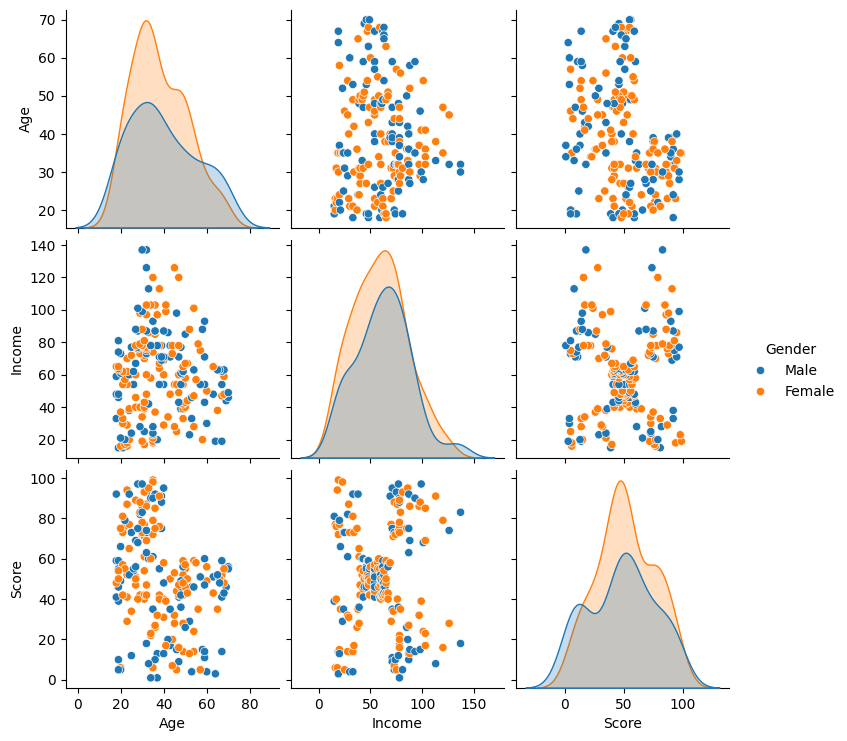

In [3]:
#code
ds1 = pd.read_csv('dataset1.csv')
ds1.drop('ID', axis=1, inplace=True)
sns.pairplot(ds1, hue="Gender")

#Task 1.2. Plot the distribution of numerical features (age, income and score) using histogram in Seaborn or Matplotlib

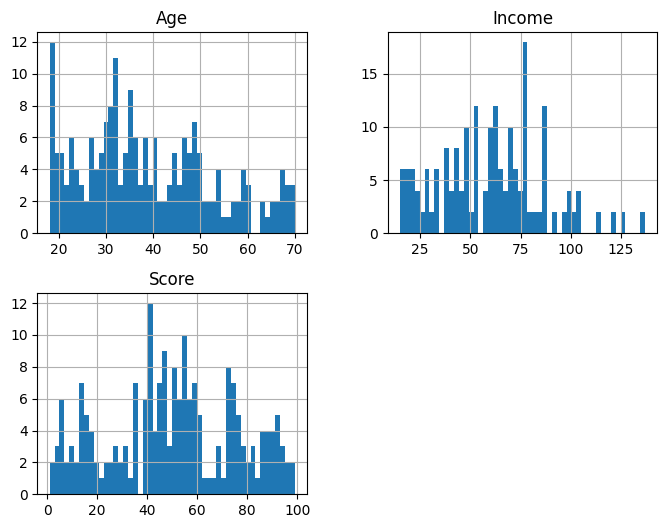

In [4]:
#code
ds1.hist(bins=50, figsize=(8,6))
plt.show()

#Task 1.3. Apply appropriate preprocessing techniques to the dataset in the Task 1.1 (later used for clustering)

In [8]:
#code
X = ds1[['Age', 'Income', 'Score']]
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

#Task 1.4. Apply K-Means algorithm to the dataset obtained in the Task 1.3 with k belonging to the range (3, 10). Then, plot the SSE values for different k values to find the best value of k.

In [9]:
#code
kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans.fit(X_scale)
clusters = kmeans.predict(X_scale)
kmeans.cluster_centers_.shape

(3, 3)

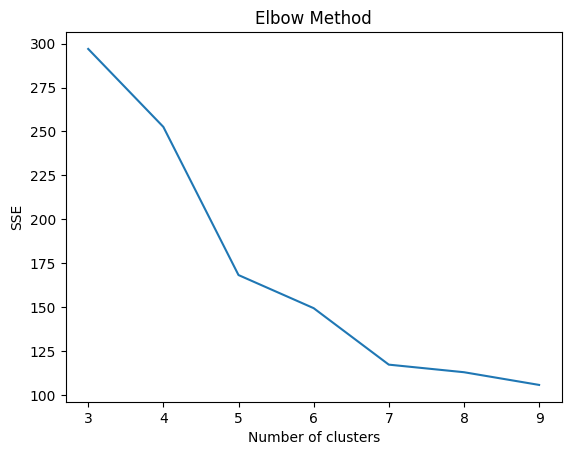

In [10]:
sse = []
for k in range(3, 10):
 kmeans = KMeans(n_clusters=k, random_state = 0)
 kmeans. fit(X_scale)
 sse. append(kmeans.inertia_)

plt.plot(range(3, 10), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

#Task 1.5. Assign the Cluster Labels to the dataset1 with labels obtained from the best k value in the Task 1.4

In [22]:
#code
best_k = 7
kmeans = KMeans(n_clusters=best_k, random_state=42)
ds1['Cluster'] = kmeans.fit_predict(X_scale)

#Task 1.6. Apply describe() method for each cluster to see more details of each cluster

In [25]:
#code
ds1.groupby('Cluster').describe()

Age                                                      Income  \
        count       mean        std   min   25%   50%    75%   max  count   
Cluster                                                                     
0        44.0  56.340909   8.550651  43.0  49.0  54.0  65.25  70.0   44.0   
1        39.0  32.692308   3.728650  27.0  30.0  32.0  35.50  40.0   39.0   
2        23.0  25.000000   5.300086  18.0  21.0  23.0  29.50  35.0   23.0   
3         9.0  27.444444   7.699206  19.0  20.0  25.0  34.00  37.0    9.0   
4        27.0  45.740741   7.949807  32.0  41.0  45.0  51.00  59.0   27.0   
5        21.0  45.523810  11.766984  20.0  36.0  46.0  53.00  67.0   21.0   
6        37.0  27.108108   7.097667  18.0  21.0  27.0  32.00  40.0   37.0   

                    ...               Score                              \
              mean  ...    75%    max count       mean        std   min   
Cluster             ...                                                   
0        53.704545  ...   62.0   67.0  44.0  49.386364   5.993081  35.0   
1        86.538462  ...   95.0  137.0  39.0  82.128205   9.364489  63.0   
2        25.260870  ...   31.5   39.0  23.0  77.608696  13.272457  39.0   
3        77.333333  ...   78.0   87.0   9.0  10.555556   9.475114   1.0   
4        91.185185  ...  100.0  137.0  27.0  19.962963   9.533268   5.0   
5        26.285714  ...   33.0   39.0  21.0  19.380952  12.555780   3.0   
6        56.297297  ...   63.0   76.0  37.0  49.675676   7.199746  34.0   

                                  
           25%   50%   75%   max  
Cluster                           
0        45.75  49.0  55.0  60.0  
1        74.50  83.0  90.0  97.0  
2        73.00  77.0  84.5  99.0  
3         5.00  10.0  12.0  29.0  
4        13.50  17.0  26.5  39.0  
5         6.00  15.0  31.0  40.0  
6        42.00  50.0  55.0  61.0  

[7 rows x 24 columns]

#Task 2. Compare the performance of K-Means algorithm with other classification algorithms

#Task 2.1. With the dataset2 with attributes: **gender**, **ethnicity**, **education**, **lunch**, **test preparation course**, **math score**, **reading score**, **writing score**. Load the given dataset and display the first 5 rows


In [26]:
#code
ds2 = pd.read_csv('dataset2.csv')
ds2.head(5)

,gender,ethnicity,education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#Task 2.2. display the correlation between the numeric variables - math score, reading score and writing score using pairplot

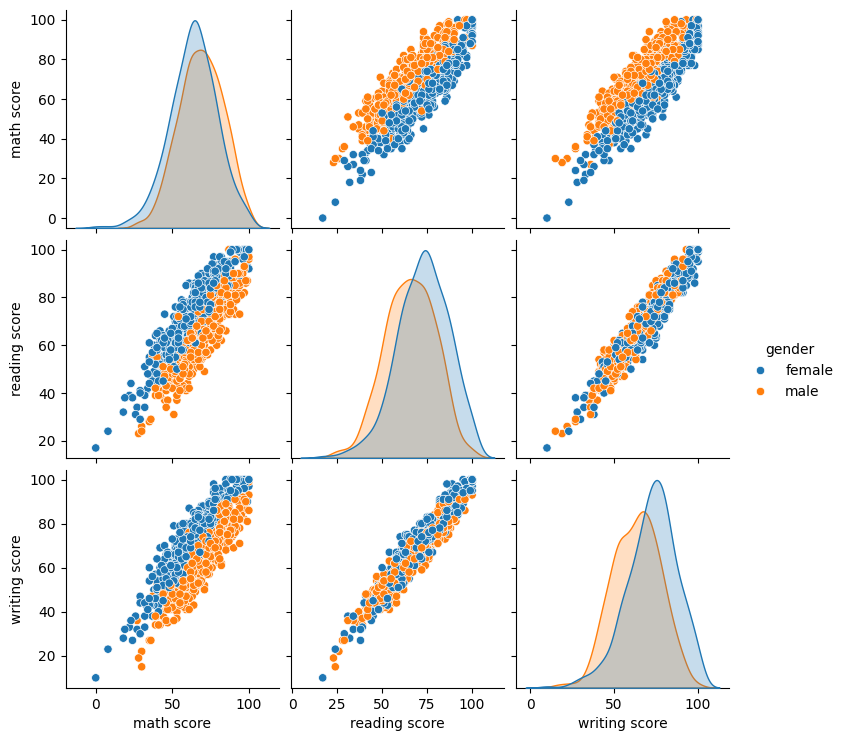

In [27]:
#code
sns.pairplot(ds2, vars=["math score", "reading score", "writing score"], hue="gender")

#Task 2.3. add columns for grade marks for each exam (math, reading, and writing scores) as follows: >90 = A, >80 = B, >70 = C, >60 = D, >50 = E, <=50 = F

In [36]:
#code
def get_grade(score):
  if score > 90:
    return 'A'
  elif score > 80:
    return 'B'
  elif score > 70:
    return 'C'
  elif score > 60:
    return 'D'
  elif score > 50:
    return 'E'
  else:
    return 'F'

ds2['math grade mark'] = ds2['math score'].apply(get_grade)
ds2['reading grade mark'] = ds2['reading score'].apply(get_grade)
ds2['writing grade mark'] = ds2['writing score'].apply(get_grade)

display(ds2.head())

,gender,ethnicity,education,lunch,test preparation course,math score,reading score,writing score,failed,math grade mark,reading grade mark,writing grade mark
0,0,1,1,1,1,72,72,74,0,C,C,C
1,0,2,4,1,0,69,90,88,0,D,B,B
2,0,1,3,1,1,90,95,93,0,B,A,A
3,1,0,0,0,1,47,57,44,1,F,E,F
4,1,2,4,1,1,76,78,75,0,C,C,C


#Task 2.4. Plot histograms for the exam scores and grade marks (generated in the Task 2.3)


<Axes: xlabel='math score', ylabel='Count'>

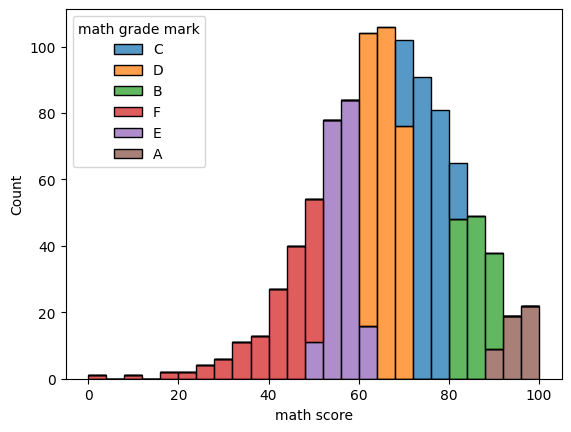

In [30]:
#code
sns.histplot(data=ds2, x="math score", hue="math grade mark", multiple='stack')

<Axes: xlabel='reading score', ylabel='Count'>

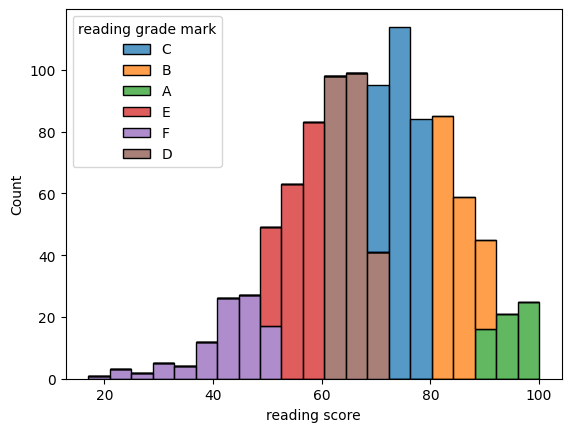

In [31]:
sns.histplot(data=ds2, x="reading score", hue="reading grade mark", multiple='stack')

<Axes: xlabel='writing score', ylabel='Count'>

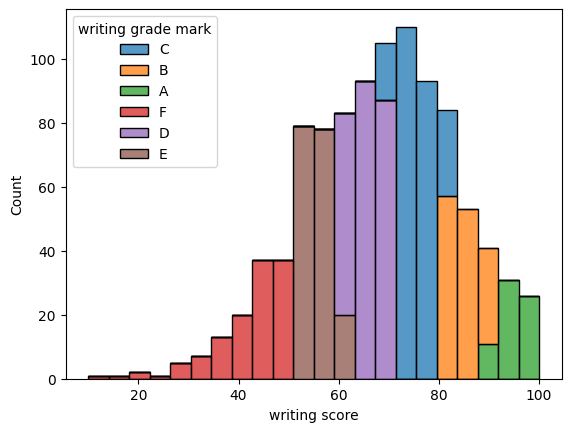

In [32]:
sns.histplot(data=ds2, x="writing score", hue="writing grade mark", multiple='stack')

#Task 2.5. Add the class column (named **failed**) to the dataset:

*   **failed = 1** (if student has failed 1 or more exams)
*   **failed = 0** (if student has not failed any exam)

In [33]:
#code
ds2['failed'] = ds2.apply(lambda row: 1 if row['math grade mark'] == 'F' or row['reading grade mark'] == 'F' or row['writing grade mark'] == 'F' else 0, axis=1)
ds2.head()

,gender,ethnicity,education,lunch,test preparation course,math score,reading score,writing score,math grade mark,reading grade mark,writing grade mark,failed
0,female,group B,bachelor's degree,standard,none,72,72,74,C,C,C,0
1,female,group C,some college,standard,completed,69,90,88,D,B,B,0
2,female,group B,master's degree,standard,none,90,95,93,B,A,A,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,F,E,F,1
4,male,group C,some college,standard,none,76,78,75,C,C,C,0


#Task 2.6. Apply approriate preprocessing techniques to the dataset obtained in the Task 2.5. for further classification task

In [41]:
#code
X = ds2.drop(columns=['failed'])
y = ds2['failed']

encoder = LabelEncoder()
# ds2.drop(['math grade mark', 'reading grade mark', 'writing grade mark'], axis=1, inplace=True)
X['gender'] = encoder.fit_transform(X['gender'])
X['ethnicity'] = encoder.fit_transform(X['ethnicity'])
X['education'] = encoder.fit_transform(X['education'])
X['lunch'] = encoder.fit_transform(X['lunch'])
X['test preparation course'] = encoder.fit_transform(X['test preparation course'])
X[['math score', 'reading score', 'writing score']] = scaler.fit_transform(X[['math score', 'reading score', 'writing score']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Task 2.7. Apply K-Means to the dataset obtained in the Task 2.6 with k=2. Then report the performance of the model

In [52]:
#code
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_train)

k_means_accuracy = accuracy_score(y_train, clusters)

k_means_accuracy

0.47

#Task 2.8. Apply classification algorithms such as Random Forest, KNN, Decision Tree, Naive Bayes to the dataset obtained in the Task 2.6.

In [47]:
#code
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
rf_y_pred = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)

kNN_clf = KNeighborsClassifier()
kNN_clf.fit(X_train, y_train)
kNN_y_pred = kNN_clf.predict(X_test)
kNN_accuracy = accuracy_score(y_test, kNN_y_pred)

dt_clf = DecisionTreeClassifier(max_depth=3)
dt_clf.fit(X_train, y_train)
dt_y_pred = dt_clf.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)

gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)
gnb_y_pred = gnb_clf.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_y_pred)

#Task 2.9. Compare the performance of models in the Task 2.7 and Task 2.8 using PrettyTable

In [48]:
#code
table = PrettyTable()

table.field_names = ["Model", "Accuracy"]
table.add_row(["K-Means", k_means_accuracy])
table.add_row(["Random Forest", rf_accuracy])
table.add_row(["KNN", kNN_accuracy])
table.add_row(["Decision Tree", dt_accuracy])
table.add_row(["Naive Bayes", gnb_accuracy])

print(table)

+---------------+--------------------+
|     Model     |      Accuracy      |
+---------------+--------------------+
|    K-Means    |        0.47        |
| Random Forest | 0.9933333333333333 |
|      KNN      |        0.92        |
| Decision Tree |        1.0         |
|  Naive Bayes  | 0.9166666666666666 |
+---------------+--------------------+




---
# End of Lab 9: Clutering Analysis
# Done by: 21130429 - Phạm Tiến Lộc

